In [11]:
import qiskit as qk
from qiskit import ClassicalRegister,QuantumRegister ,QuantumCircuit
from qiskit import execute ,Aer
from qiskit import IBMQ
from qiskit.tools.visualization import plot_histogram

In [12]:
IBMQ.save_account('ae3eea413b98f53a07979e58a63c61020eec0e5de949c370ac79fa791d98156e501e3aa29ab16b64e4207aade400753052d2180597599117f286a726175bc899')

Credentials already present. Set overwrite=True to overwrite.


In [13]:
#build secret qbit generator
def apply_secret_unitary(secret_unitary,qbit,quantum_circuit,dagger):
    functionmap={
                 'x':quantum_circuit.x,
                 'y':quantum_circuit.y,
                 'z':quantum_circuit.z,
                 'h':quantum_circuit.h,
                 't':quantum_circuit.t,
                }
    if dagger: functionmap['t']=quantum_circuit.tdg
    if dagger:
        [functionmap[unitary](qbit) for unitary in secret_unitary]
    else:
        [functionmap[unitary](qbit)for unitary in secret_unitary[::-1]]

In [14]:
secret_unitary= 'hz'

In [15]:
#Create the quantum circuit
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc=QuantumCircuit(q,c)

''' q[0]-teleported , q[1]-help qbit Alice ,q[2]_destination qbit Bob'''

#Aply the secret unitary
apply_secret_unitary(secret_unitary,q[0],qc,dagger=0)
qc.barrier()

#Generate the entangled pair
qc.h(q[1])
qc.cx(q[1],q[2])
qc.barrier()

#Teleportation protocol
qc.cx(q[0],q[1])
qc.h(q[0])
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.cx(q[1],q[2])
qc.cz(q[0],q[2])
qc.barrier()

#for verification we apply invers of secret unitary u^dagger on q[2] and we espect to get 0
apply_secret_unitary(secret_unitary,q[2],qc,dagger=1)
qc.measure(q[2],c[2])

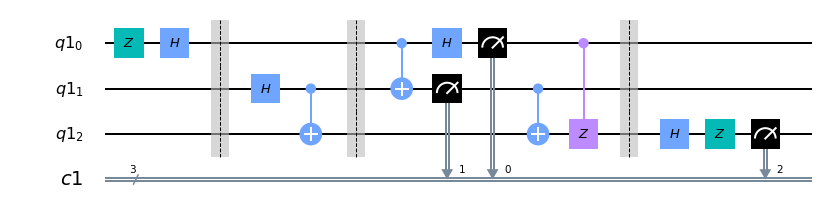

In [16]:
qc.draw(output='mpl')

{'011': 254, '000': 255, '010': 248, '001': 267}


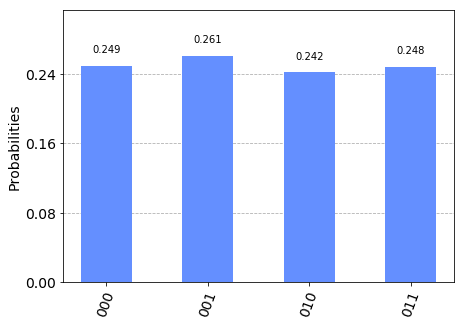

In [17]:
#simulator
backend=Aer.get_backend('qasm_simulator')
job_sim=execute(qc,backend,shots=1024)
sim_result=job_sim.result()

mesurement_result=sim_result.get_counts(qc)
print(mesurement_result)
plot_histogram(mesurement_result)

#c2c1c0

In [18]:
#real quantum computer 
IBMQ.load_account()
provider=IBMQ.get_provider(hub='ibm-q')
provider.backends()

Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [19]:
backend=provider.get_backend('ibmq_ourense')
job_exp=execute(qc,backend=backend,shots=9010)


from qiskit.tools.monitor import job_monitor
job_monitor(job_exp)

Job Status: job incurred error    


In [ ]:
exp_result=job_exp.result()

exp_mesurement_result=exp_result.get_counts(qc)
print(exp_measurement_result)
plot_histogram(exp_measurement_result)
#c2c1c0

In [20]:
job_error(job_exp)

NameError: name 'job_error' is not defined